# Rating of the neighbourhoods in SEA and the difference of prices

## Import libraries and read data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import datetime
from functions import plot_bar_average

[NbConvertApp] Converting notebook functions.ipynb to script
[NbConvertApp] Writing 941 bytes to functions.py


In [ ]:
df_cal = pd.read_csv('./calendar.csv')
df_lis = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')

In [ ]:
df_cal.head()

In [17]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## What is the most famous neighbourhood and how is this reflected in the price

- group by nb
- get the mean of the review score from location and prices
- drop the nan values -> appropriate as the overall mean would destroy data

Dropping values
- only use of the columns neighbourhood and review scores location as the rest is not analyzed in this analysis
- dropping the nan values from the review scores; alternative would be to fill them with the mean of the neighbourhood where there are missing, but this would result in the same result in my analysis -> less work to just drop them

In [5]:
df_lis["neighbourhood"].value_counts().index

Index(['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne', 'Fremont',
       'Wallingford', 'University District', 'First Hill', 'Stevens',
       'North Beacon Hill', 'Lower Queen Anne', 'Central Business District',
       'Greenwood', 'Columbia City', 'Ravenna', 'Phinney Ridge', 'Magnolia',
       'Green Lake', 'Atlantic', 'North Admiral', 'Mount Baker', 'Leschi',
       'Eastlake', 'Maple Leaf', 'Madrona', 'Pike Place Market',
       'The Junction', 'Bryant', 'Seward Park', 'Genesee', 'North Delridge',
       'Roosevelt', 'Alki', 'South Lake Union', 'Crown Hill', 'Montlake',
       'Gatewood', 'Rainier Beach', 'International District', 'Mathews Beach',
       'Madison Park', 'Broadview', 'Wedgewood', 'Haller Lake', 'Portage Bay',
       'Pioneer Square', 'Harrison/Denny-Blaine', 'Bitter Lake',
       'Victory Heights', 'Dunlap', 'Olympic Hills', 'Westlake',
       'Highland Park', 'Yesler Terrace', 'Licton Springs', 'High Point',
       'North Beach/Blue Ridge', 'Fauntlero

In [6]:
df_lis['price'] = df_lis['price'].str.replace('$','', regex = True)
df_lis['price'] = df_lis['price'].str.replace(',','', regex = True)

convert_str = lambda x : float(x)
df_lis["price"] = df_lis["price"].apply(convert_str).copy()

In [7]:
df_lis["review_scores_location"].mean()

9.608915586468543

In [8]:
df_lis["review_scores_value"]

0       10.0
1       10.0
2       10.0
3        NaN
4        9.0
        ... 
3813     8.0
3814    10.0
3815     NaN
3816     NaN
3817     NaN
Name: review_scores_value, Length: 3818, dtype: float64

missing values will be droped as they can be random (filling the mean of the neighbourhood scores into it doesnt change the outcome)

In [9]:
df_lis_nb = df_lis.groupby(["neighbourhood"]).mean()
df_lis_nb["review_scores_location"]

neighbourhood
Alki              9.866667
Arbor Heights     8.666667
Atlantic          9.093023
Ballard           9.759563
Belltown          9.807692
                    ...   
Wallingford       9.744000
Wedgewood         9.300000
Westlake          9.625000
Windermere        9.857143
Yesler Terrace    9.545455
Name: review_scores_location, Length: 81, dtype: float64

In [10]:
df_lis_nb["price"]

neighbourhood
Alki              196.652174
Arbor Heights     118.000000
Atlantic          116.280000
Ballard           123.615023
Belltown          166.627451
                     ...    
Wallingford       131.335664
Wedgewood         106.666667
Westlake          197.000000
Windermere        174.700000
Yesler Terrace    141.083333
Name: price, Length: 81, dtype: float64

Plotting the data into one graph

In [11]:
df_lis_high3 = df_lis_nb.nlargest(3, "review_scores_location")
df_lis_high3

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Pike Market,9.449410e+05,2.016010e+13,4.411144e+06,9.000000,9.000000,47.607060,-122.340955,4.000000,1.000000,1.000000,...,95.000000,9.500000,9.000000,9.0,9.500000,10.000000,9.500000,NaN,3.000000,0.530000
Roxhill,8.194164e+06,2.016010e+13,4.322606e+07,1.000000,1.000000,47.528169,-122.376347,2.000000,1.000000,1.000000,...,90.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,NaN,1.000000,0.500000
Gatewood,5.559140e+06,2.016010e+13,2.161841e+07,1.222222,1.222222,47.537877,-122.385525,3.111111,1.277778,1.444444,...,96.769231,9.769231,9.846154,10.0,9.923077,9.923077,9.846154,NaN,1.222222,2.156154


In [12]:
df_lis_high3 = df_lis_high3.append(df_lis_nb.nsmallest(3, "review_scores_location"))
df_lis_high3

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Pike Market,9.449410e+05,2.016010e+13,4.411144e+06,9.000000,9.000000,47.607060,-122.340955,4.000000,1.000000,1.000000,...,95.000000,9.500000,9.000000,9.0,9.500000,10.000000,9.500000,NaN,3.000000,0.530000
Roxhill,8.194164e+06,2.016010e+13,4.322606e+07,1.000000,1.000000,47.528169,-122.376347,2.000000,1.000000,1.000000,...,90.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,NaN,1.000000,0.500000
Gatewood,5.559140e+06,2.016010e+13,2.161841e+07,1.222222,1.222222,47.537877,-122.385525,3.111111,1.277778,1.444444,...,96.769231,9.769231,9.846154,10.0,9.923077,9.923077,9.846154,NaN,1.222222,2.156154
Pinehurst,6.993980e+06,2.016010e+13,1.053992e+07,2.333333,2.333333,47.712182,-122.319898,6.666667,1.166667,2.000000,...,85.666667,9.666667,10.000000,9.0,9.333333,8.000000,8.666667,NaN,2.333333,0.556667
South Beacon Hill,5.608100e+06,2.016010e+13,2.742051e+07,5.000000,5.000000,47.529232,-122.285153,5.000000,1.000000,2.000000,...,89.500000,9.500000,9.000000,10.0,10.000000,8.000000,9.000000,NaN,4.500000,2.535000
South Park,7.325021e+06,2.016010e+13,1.236793e+07,3.000000,3.000000,47.523924,-122.322396,5.000000,1.250000,2.500000,...,88.000000,9.000000,9.000000,9.0,10.000000,8.000000,9.000000,NaN,3.000000,1.250000


In [13]:
review_mean = df_lis["review_scores_location"].mean()
price_mean = df_lis["price"].mean()

In [14]:
df = pd.merge((df_lis_high3["review_scores_location"]-review_mean)/review_mean, (df_lis_high3["price"]-price_mean)/price_mean, on="neighbourhood")
df

,review_scores_location,price
neighbourhood,,
Pike Market,0.040700,-0.281116
Roxhill,0.040700,-0.531163
Gatewood,0.032695,-0.041488
Pinehurst,-0.167440,0.078326
South Beacon Hill,-0.167440,-0.081860
South Park,-0.167440,-0.199070


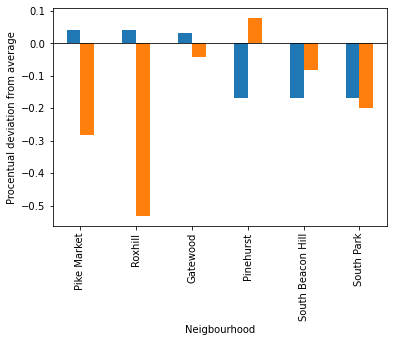

In [21]:
plot_bar_average(df,"nbprice_score.png", "Neigbourhood", "Procentual deviation from average", print_xaxis = True)

Disclaimer: 
- in specific neighbourhoods there could be smaller and bigger appartments that have an influence on the price -> present the average size of the bnbs
- Location is not only nighbourhood dependent, also maybe if there is a big street or sth